In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


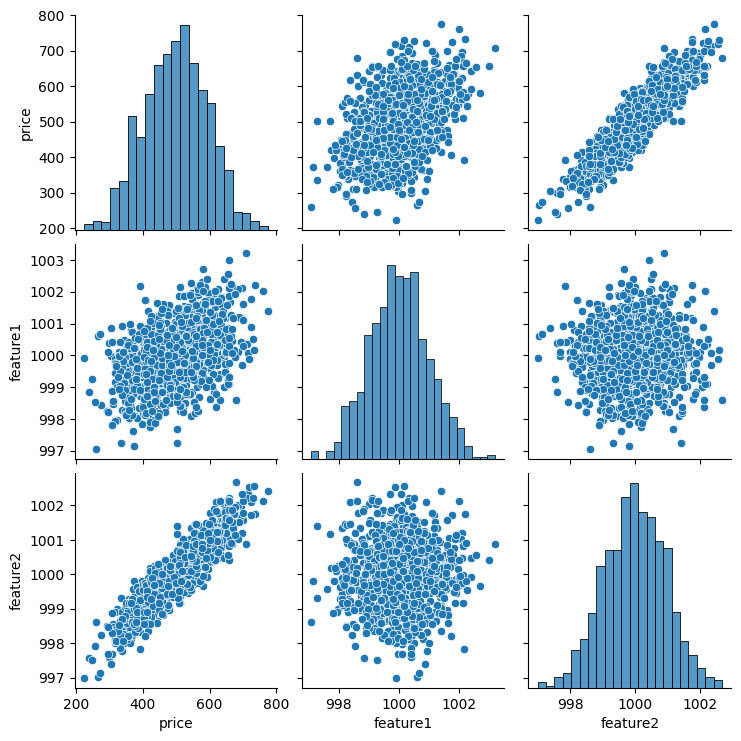

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1', 'feature2']].values #to return it as an array , as the keras understands only numpy arrays

In [7]:
y=df['price'].values

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [9]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [11]:
X_train.shape

(700, 2)

In [12]:
X_test.shape

(300, 2)

In [13]:
#As we are working with weights and biases in training set, it is advantageous to normalize the feature first before doing the data exploration
from sklearn.preprocessing import MinMaxScaler

In [14]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)
#calculates the required parameter like std etc for the scaling process
#this process is only done for the training set
#and it is not done on the test set because to avoid data loss from the
# test set and not giving the model the intuition that prior information is available regarding the test set 
# 

MinMaxScaler()

In [17]:
X_train=scaler.transform(X_train)

In [18]:
X_train.min()

0.0

In [19]:
from tensorflow.keras.models import Sequential
#building a sequential model relevant for the deep learning precedure

In [20]:
from tensorflow.keras.layers import Dense 
#importing Dense as we are leveraging deep nerons underneath

In [21]:
model=Sequential([Dense(4, activation='relu'), Dense(2, activation='relu'), Dense(1)]) 
#activation funtion is the rectified unit 
#number of neurons in the inside layer is equal to 4

#Alternative way
#model=Sequential()
#model.add(Dense(4, activation='relu))
#model.add(Dense(2, activation='relu))
#model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [22]:
model.fit(x=X_train, y=y_train, epochs=250) #epochs repeatation to the model verbatose details representation


Epoch 1/250
22/22 [==============================] - 1s 5ms/step - loss: 256579.1719
Epoch 2/250
22/22 [==============================] - 0s 4ms/step - loss: 256441.5469
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 256283.0625
Epoch 4/250
22/22 [==============================] - 0s 3ms/step - loss: 256104.5000
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 255908.7500
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 255696.8906
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 255468.2344
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 255220.8750
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 254956.3594
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 254673.5469
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 254372.4375
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

In [23]:
X_train.shape

(700, 2)

In [24]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

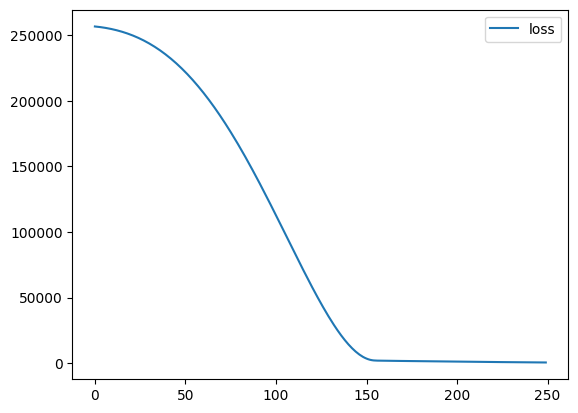

In [25]:
loss_df.plot()

In [26]:
scaler.fit(X_test)
X_test=scaler.transform(X_test)

In [27]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 472.3473


472.3472900390625

In [28]:
test_predictions=model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [29]:
test_predictions

array([[431.9778 ],
       [607.73865],
       [585.55865],
       [559.30774],
       [387.23645],
       [569.9863 ],
       [507.15366],
       [480.6547 ],
       [541.04474],
       [472.4003 ],
       [598.6079 ],
       [561.1371 ],
       [442.0684 ],
       [431.68497],
       [644.21405],
       [461.5828 ],
       [526.30505],
       [625.42487],
       [634.19604],
       [566.4404 ],
       [367.76608],
       [462.98245],
       [408.4963 ],
       [411.2157 ],
       [560.92505],
       [590.18945],
       [532.3154 ],
       [451.43484],
       [625.3839 ],
       [444.38382],
       [467.28946],
       [496.3242 ],
       [459.67062],
       [648.52527],
       [456.52847],
       [436.212  ],
       [524.32574],
       [550.0175 ],
       [505.6104 ],
       [411.0646 ],
       [606.74225],
       [445.07547],
       [594.8512 ],
       [474.3555 ],
       [509.59573],
       [588.8499 ],
       [655.2711 ],
       [505.81467],
       [368.31342],
       [495.2167 ],


In [30]:
model.metrics_names

['loss']

In [31]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [32]:
training_score

470.05303955078125

In [33]:
test_score

472.3472900390625

In [34]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [35]:
test_predictions

array([[431.9778 ],
       [607.73865],
       [585.55865],
       [559.30774],
       [387.23645],
       [569.9863 ],
       [507.15366],
       [480.6547 ],
       [541.04474],
       [472.4003 ],
       [598.6079 ],
       [561.1371 ],
       [442.0684 ],
       [431.68497],
       [644.21405],
       [461.5828 ],
       [526.30505],
       [625.42487],
       [634.19604],
       [566.4404 ],
       [367.76608],
       [462.98245],
       [408.4963 ],
       [411.2157 ],
       [560.92505],
       [590.18945],
       [532.3154 ],
       [451.43484],
       [625.3839 ],
       [444.38382],
       [467.28946],
       [496.3242 ],
       [459.67062],
       [648.52527],
       [456.52847],
       [436.212  ],
       [524.32574],
       [550.0175 ],
       [505.6104 ],
       [411.0646 ],
       [606.74225],
       [445.07547],
       [594.8512 ],
       [474.3555 ],
       [509.59573],
       [588.8499 ],
       [655.2711 ],
       [505.81467],
       [368.31342],
       [495.2167 ],


In [36]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [37]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [38]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [39]:
test_predictions

0      431.977814
1      607.738647
2      585.558655
3      559.307739
4      387.236450
          ...    
295    525.572998
296    498.317139
297    598.095947
298    447.762970
299    431.269562
Length: 300, dtype: float32

In [40]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [41]:
pred_df.columns = ['Test Y','Model Predictions']

In [42]:
pred_df

,Test Y,Model Predictions
0,402.296319,431.977814
1,624.156198,607.738647
2,582.455066,585.558655
3,578.588606,559.307739
4,371.224104,387.236450
...,...,...
295,525.704657,525.572998
296,502.909473,498.317139
297,612.727910,598.095947
298,417.569725,447.762970


<Axes: xlabel='Test Y', ylabel='Model Predictions'>

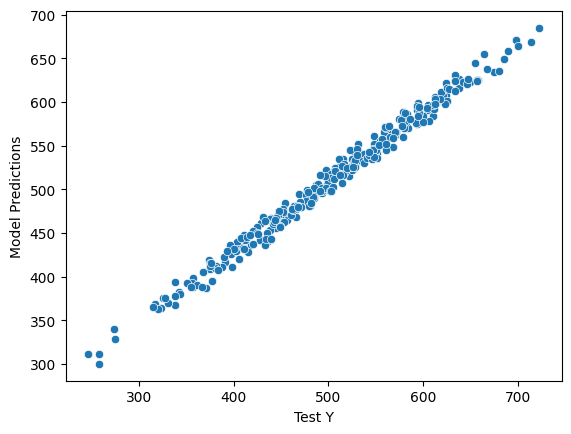

In [43]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [44]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

C:\Users\KIIT\AppData\Local\Temp\ipykernel_14040\1356567216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50)


<Axes: xlabel='Error', ylabel='Density'>

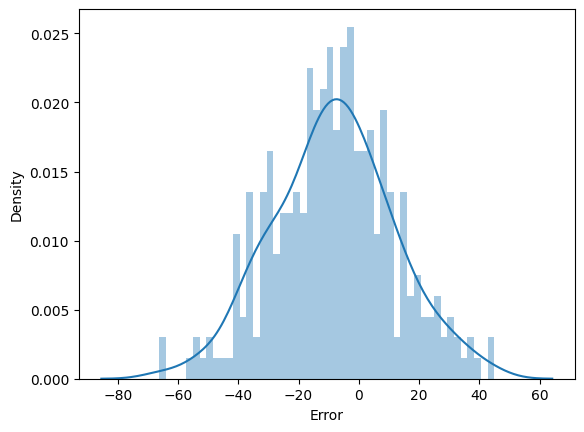

In [45]:
sns.distplot(pred_df['Error'],bins=50)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

17.247012571116016

In [48]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

472.3472886529606

In [49]:
test_score

472.3472900390625

In [50]:
test_score**0.5

21.733552172598536

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [53]:
later_model = load_model('my_model.h5')